# IQ calibration with qubit

## Measure superconducting qubit states

Supercondcting qubits can be modeled as nonlinear LC circuits. These qubits are normally connected with coplanar waveguide resonators to form a coupled quantum system. Then the qubit state can be readout by probing the resonator's resonance with a microwave tone. 

An microwave tone coming out of the resonator can be expressed as
$$
f(t) = I\cos\omega{}t-Q\sin\omega{}t.
$$
Resonance information is stored in $(I, Q)$, which can be represented by a point on the so-called IQ-plane. If we keep probing the resonator and lay all $(I, Q)$ points on the plane, on-resonant response and off-resonant response will form two clusters, both obeying Gaussian distribution.

When measured, qubit will be projected to either ground or excited state. If we setup the system such that the readout microwave tone is on-resonant with the resonator when qubit is at ground state, off-resonant when excited. Then the measured $(I, Q)$ will fall into one of the two clusters determined by qubit state at the readout moment. This way qubit state diecrimination is essentially drawing a line between two clusters. Support vector machine is a well established tool to solve this kind of problem.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from experiment import Experiment
from classifer import SingleQubitClassifier

First load the experiment settings and data into an __Experiment__ object. This one-line code will import necessary imformation from the .csv and .xml files generated by our experiment program written in LabVIEW.

In [2]:
# the required input is path to the data folder
Ramsey_exp = Experiment('test\Ramsey')

We can check some basic settings.

In [3]:
print(Ramsey_exp.scan_setup, '\n') # scan settings
print(Ramsey_exp.scan_init) # initial settings

                   0           1
Enabled         TRUE        TRUE
Target     Sequencer      Repeat
Parameter       N.A.         Smp
Scan #             0           1
Object #         999         999
Start       0.000000    0.000000
Stop        0.000000  999.000000
# of Step          1        1000 

                               0         1
Readout freq (GHz)       6.05076   6.09910
Readout pwr (dBm)       15.00000  15.00000
Readout atten (dB)     -50.00000 -50.00000
Qubit freq (GHz)         5.17443   5.42902
Qubit pwr (dBm)          4.40000   4.40000
Qubit atten (dB)       -23.50000 -20.20000
Qubit bias (mA/mV)       0.00000   0.00000
Amplifier freq (GHz)     6.08496   0.00000
Amplifier pwr (dBm)      1.34000   0.00000
Amplifier atten (dB)     0.00000   0.00000
Amplifier bias (mA/mV) -56.22000   0.00000


This Ramsey experiment has a scan size of __101*1000__.

In [16]:
print(Ramsey_exp.scan_size)

[ 101 1000]


We can also check the experiment raw data. Data has a three layer structure with the form of __data\[resonator index\]\[IQ quadrature index\]\[shape of scan setup\]__.

In [17]:
print(Ramsey_exp.data[0][0], '\n') # I coordinates
print(Ramsey_exp.data[0][1]) # Q coordinates

[[-6.236700e-04  2.463079e-03 -1.905495e-03 ... -2.056777e-03
   2.346748e-03  3.326322e-03]
 [-3.318921e-03 -8.185580e-04 -5.371960e-04 ...  2.849572e-03
  -3.133400e-05  1.084891e-03]
 [ 2.027870e-03  1.748317e-03  4.712530e-03 ...  8.702040e-04
   2.326761e-03  3.481950e-03]
 ...
 [ 5.051564e-03 -1.179560e-03 -1.600105e-03 ...  1.350328e-03
  -2.474245e-03  3.991560e-04]
 [ 6.049310e-04  7.846730e-04 -7.427800e-05 ... -1.917060e-04
   2.584540e-03  4.922570e-04]
 [ 1.779283e-03  4.545665e-03  4.278158e-03 ...  2.755939e-03
   7.929860e-04  4.614200e-04]] 

[[0.00121039 0.00471409 0.00493768 ... 0.00152401 0.00333146 0.00117074]
 [0.00512547 0.00590019 0.00337321 ... 0.00662756 0.00436645 0.00372294]
 [0.00460428 0.00611167 0.00516134 ... 0.0063046  0.00348999 0.0032602 ]
 ...
 [0.00629282 0.00423572 0.00280233 ... 0.00538971 0.00451374 0.0036846 ]
 [0.00286824 0.00738709 0.00085912 ... 0.00622285 0.0040316  0.00452972]
 [0.00100914 0.00229817 0.00374745 ... 0.00114677 0.00480166 0.0

Then we can use __SingleQubitClassfier__ to do SVM for the second qubit. This part takes advantage of the great __scikit-learn__ package.

In [5]:
clf = SingleQubitClassifier(Ramsey_exp, qubit=1)

If we want to visualize how the classification works, we can plot the training set and the best estimated boundary.

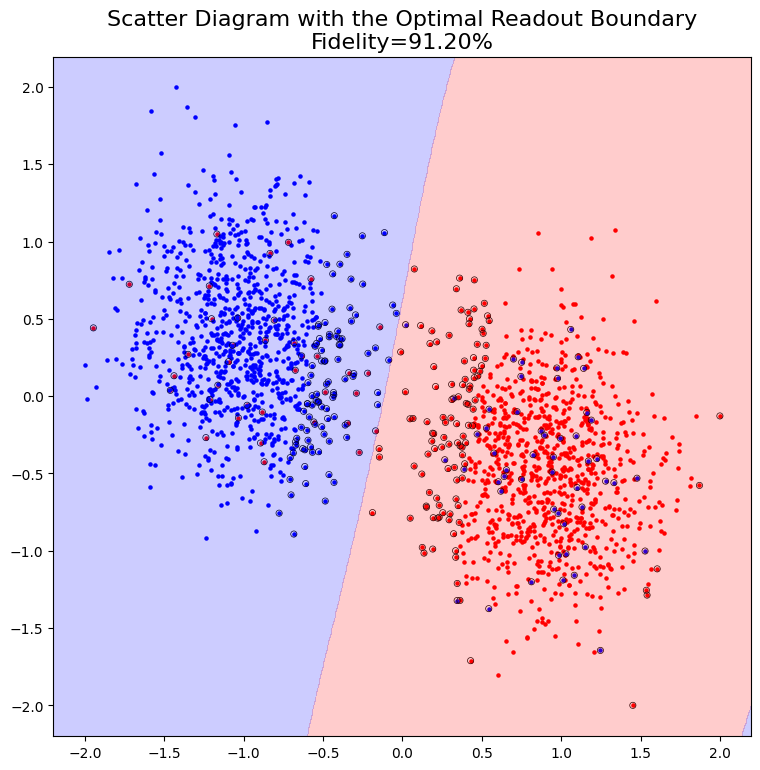

In [6]:
clf.plot_boundary()

Next we can use the model to predict qubit states for the whole data space.

In [18]:
prediction = clf.predict()

print(prediction)
print(prediction.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [1 1 0 ... 1 1 0]
 [1 0 0 ... 0 1 1]
 [1 0 1 ... 1 0 0]]
(101, 1000)


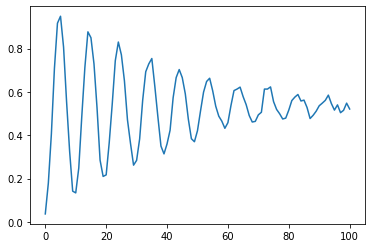

In [26]:
population = np.mean(prediction, axis=1)

plt.plot(range(Ramsey_exp.scan_size[0]), population)
plt.show()